# Final Project, Part 3.1

## Group 9 :
    
* Sowmya Bhupatiraju
* Job Monita
* Bennett Custer

**What is the "name" of the dataset?**

The name of the dataset is "US-Accidents". This is a countrywide car accident dataset, which covers 49 states of the USA. 

**Where did you obtain it?**

The dataset was obtained from multiple traffic APIs that provide streaming traffic incident (or event) data. This dataset has been collected in real-time, using multiple Traffic APIs. Currently, it contains accident data that are collected from February 2016 to Dec 2021 for the Contiguous United States. Personally I collected the dataset from the following sources
Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

Note: The dataset is also available in Kaggle for easy download 

**Where can we obtain it? (i.e., URL)**

The dataset can be obtained from the following URL: https://smoosavi.org/datasets/us_accidents.

**What is the license of the dataset? What are we allowed to do with it?**

The dataset is licensed under the Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0) license. This means that the dataset can be used only for non-commercial, research, or academic applications. If you use this dataset, you must cite the papers mentioned in the Acknowledgements section.

**How big is it in file size and in items? Looking ahead, how does this relate to GitHub's limits on uploading large files? If you plan on hosting the data yourself and it is larger than GitHub's limits, state your plan for how you will address this issue.**

The current dataset has around 2.8 million accident records. The file size is around 1.2 GB in CSV format. This file size is larger than GitHub's limits on uploading large files. If you plan on hosting the data yourself and it is larger than GitHub's limits, you can use cloud storage services like Google Drive or Dropbox.

**Summarize the characteristics of the dataset in words: what does it represent, what are the fields/columns/rows, what data types are they, etc**

*USAccident contains about 2.25 million cases of traffic accidents that took place within the contiguous United States from February 2016 to March 2019.There are 2845342 observations and 47 attributes. The data itself is collected from streaming traffic data using two real-time data providers, namely “MapQuest Traffic” [12] and “Microsoft Bing Map Traffic” [3], whose APIs broadcast traffic events (accident, congestion, etc.) captured by avariety of entities - the US and state departments of transportation,law enforcement agencies, traffic cameras, and traffic sensors within
the road-networks. The data is pulled every 90 seconds *

**Attributes:** 
- Traffic Attributes (10) : id, source, TMC, severity, start_time, end_time, start_point, end_point, distance, and description
- Address Attributes (8) : number, street, side (left/right), city, county, state, zip-code, country
- Weather Attributes (10) : time, temperature, wind_chill, humidity,pressure, visibility, wind_direction, wind_speed,
precipitation, and condition (e.g., rain, snow, etc.)
- Amenity : Refers to particular places such as restaurant,library, college, bar, etc.
- Bump : Refers to speed bump or hump to reduce the speed.
- Crossing : Refers to any crossing across roads for pedestrians, cyclists, etc
- Give-way : A sign on road which shows priority of passing
- Junction : Refers to any highway ramp, exit, or entrance.
- No-exit : Indicates there is no possibility to travel further by any transport mode along a formal path or route.
- Railway : Indicates the presence of railways.
- Roundabout : Refers to a circular road junction.
- Station : Refers to public transportation station (bus, metro, etc.)
- Stop : Refers to stop sign
- Traffic Calming : Refers to any means for slowing down traffic speed.
- Traffic Signal : Refers to traffic signal on intersections.
- Turning Loop : Indicates a widened area of a highway with a non-traversable island for turning around.
- Period-of-Day Attributes(4) : Sunrise/Sunset, Civil Twilight, Nautical Twilight, and Astronomical Twilight

   
   
   
   

In [1]:
#importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

import ipywidgets

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
#Loading data from github
df = pd.read_csv('US_Accidents_Dec21_updated.csv')
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [4]:
df['Weather_Condition']

0             Light Rain
1             Light Rain
2               Overcast
3               Overcast
4             Light Rain
               ...      
2845337             Fair
2845338             Fair
2845339    Partly Cloudy
2845340             Fair
2845341             Fair
Name: Weather_Condition, Length: 2845342, dtype: object

In [5]:
df.corr()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
Severity,1.000000,0.089207,0.114063,0.089209,0.114064,0.092140,-0.000689,-0.045335,-0.097459,0.037802,...,0.008141,0.045928,-0.002359,-0.001747,-0.000773,-0.018017,-0.002536,-0.003009,-0.012798,NaN
Start_Lat,0.089207,1.000000,-0.154965,0.999995,-0.154962,0.071588,0.101281,-0.475065,-0.505567,0.005876,...,0.007851,0.043628,-0.017348,0.003184,-0.003366,-0.107697,0.010817,-0.003164,-0.058208,NaN
Start_Lng,0.114063,-0.154965,1.000000,-0.154956,0.999999,0.039861,-0.170566,0.032159,0.010849,0.170909,...,0.018110,-0.017202,0.006220,-0.015450,0.000450,0.038533,-0.040265,-0.007750,0.059568,NaN
End_Lat,0.089209,0.999995,-0.154956,1.000000,-0.154953,0.071593,0.101270,-0.475058,-0.505561,0.005869,...,0.007840,0.043621,-0.017347,0.003184,-0.003366,-0.107696,0.010827,-0.003163,-0.058210,NaN
End_Lng,0.114064,-0.154962,0.999999,-0.154953,1.000000,0.039830,-0.170563,0.032163,0.010852,0.170904,...,0.018110,-0.017199,0.006220,-0.015449,0.000450,0.038533,-0.040264,-0.007750,0.059566,NaN
Distance(mi),0.092140,0.071588,0.039861,0.071593,0.039830,1.000000,0.067331,-0.051212,-0.060094,0.026860,...,-0.006655,0.022442,-0.010184,-0.021462,-0.002491,-0.052826,-0.027108,-0.007322,-0.105722,NaN
Number,-0.000689,0.101281,-0.170566,0.101270,-0.170563,0.067331,1.000000,-0.051146,-0.049400,0.015825,...,-0.003792,-0.010801,-0.005052,-0.013668,-0.001360,-0.028485,-0.003688,-0.005075,-0.058870,NaN
Temperature(F),-0.045335,-0.475065,0.032159,-0.475058,0.032163,-0.051212,-0.051146,1.000000,0.993857,-0.366527,...,-0.005524,-0.020358,0.011610,0.003108,0.002122,0.061248,0.000021,0.005672,0.047657,NaN
Wind_Chill(F),-0.097459,-0.505567,0.010849,-0.505561,0.010852,-0.060094,-0.049400,0.993857,1.000000,-0.346028,...,-0.007584,-0.048784,0.012066,0.005062,0.002466,0.069379,0.005424,0.007140,0.048321,NaN
Humidity(%),0.037802,0.005876,0.170909,0.005869,0.170904,0.026860,0.015825,-0.366527,-0.346028,1.000000,...,0.000063,0.006394,-0.007099,-0.000309,0.000904,-0.000095,-0.015631,-0.005727,-0.034133,NaN


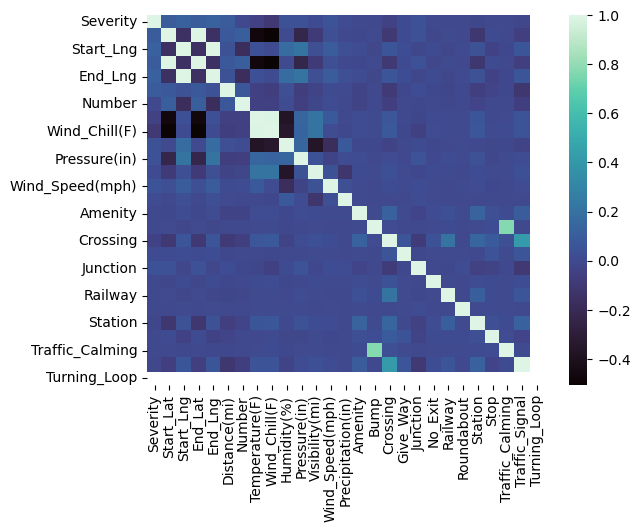

In [6]:
sns.heatmap(df.corr(), cmap="mako")
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [8]:
df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

### Impact of time on the target Variable

In [9]:
#Drop ID,City,County,Description,Number,Street,Zipcode because it has too many columns and are redundant
df_new = df.drop(['Wind_Direction','Weather_Timestamp','Country','ID','Start_Time','End_Time','City', 'County','Description','Number','Street','Zipcode'],axis=1)

In [10]:
df_new = df_new.drop(['Amenity','Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway','Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal','Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight'],axis=1)
df_new

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Side,State,Timezone,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition
0,3,40.108910,-83.092860,40.112060,-83.031870,3.230,R,OH,US/Eastern,KOSU,42.1,36.1,58.0,29.76,10.0,10.4,0.00,Light Rain
1,2,39.865420,-84.062800,39.865010,-84.048730,0.747,R,OH,US/Eastern,KFFO,36.9,NaN,91.0,29.68,10.0,NaN,0.02,Light Rain
2,2,39.102660,-84.524680,39.102090,-84.523960,0.055,R,OH,US/Eastern,KLUK,36.0,NaN,97.0,29.70,10.0,NaN,0.02,Overcast
3,2,41.062130,-81.537840,41.062170,-81.535470,0.123,R,OH,US/Eastern,KAKR,39.0,NaN,55.0,29.65,10.0,NaN,NaN,Overcast
4,3,39.172393,-84.492792,39.170476,-84.501798,0.500,R,OH,US/Eastern,KLUK,37.0,29.8,93.0,29.69,10.0,10.4,0.01,Light Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,2,34.002480,-117.379360,33.998880,-117.370940,0.543,R,CA,US/Pacific,KRAL,86.0,86.0,40.0,28.92,10.0,13.0,0.00,Fair
2845338,2,32.766960,-117.148060,32.765550,-117.153630,0.338,R,CA,US/Pacific,KMYF,70.0,70.0,73.0,29.39,10.0,6.0,0.00,Fair
2845339,2,33.775450,-117.847790,33.777400,-117.857270,0.561,R,CA,US/Pacific,KSNA,73.0,73.0,64.0,29.74,10.0,10.0,0.00,Partly Cloudy
2845340,2,33.992460,-118.403020,33.983110,-118.395650,0.772,R,CA,US/Pacific,KSMO,71.0,71.0,81.0,29.62,10.0,8.0,0.00,Fair


In [11]:
label_encoder = preprocessing.LabelEncoder()
df['Airport_Code']= label_encoder.fit_transform(df['Airport_Code'])
df['Weather_Condition'] = label_encoder.fit_transform(df['Airport_Code'])

In [12]:
df_new['Weather_Condition'] = df['Weather_Condition']
df_new['Airport_Code'] = df['Airport_Code'] 

In [13]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [14]:
final_df2 = df[['Amenity','Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway','Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal','Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight']]
final_df2            

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845338,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845339,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845340,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [15]:
final_df3 = pd.DataFrame()

In [16]:
final_df2 = pd.get_dummies(final_df2,columns=['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight','Amenity', 'Crossing', 'Give_Way', 'Junction', 'No_Exit','Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming','Traffic_Signal', 'Turning_Loop'],dummy_na=True,drop_first=True)
final_df2

,Bump,Sunrise_Sunset_Night,Sunrise_Sunset_nan,Civil_Twilight_Night,Civil_Twilight_nan,Nautical_Twilight_Night,Nautical_Twilight_nan,Astronomical_Twilight_Night,Astronomical_Twilight_nan,Amenity_True,...,Roundabout_nan,Station_True,Station_nan,Stop_True,Stop_nan,Traffic_Calming_True,Traffic_Calming_nan,Traffic_Signal_True,Traffic_Signal_nan,Turning_Loop_nan
0,False,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,False,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2845338,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2845339,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2845340,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
final_df2 = pd.get_dummies(final_df2,columns=['Bump'],dummy_na=True,drop_first=True)


In [18]:
final_df2

,Sunrise_Sunset_Night,Sunrise_Sunset_nan,Civil_Twilight_Night,Civil_Twilight_nan,Nautical_Twilight_Night,Nautical_Twilight_nan,Astronomical_Twilight_Night,Astronomical_Twilight_nan,Amenity_True,Amenity_nan,...,Station_nan,Stop_True,Stop_nan,Traffic_Calming_True,Traffic_Calming_nan,Traffic_Signal_True,Traffic_Signal_nan,Turning_Loop_nan,Bump_True,Bump_nan
0,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2845338,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2845339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2845340,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
final_df2.columns

Index(['Sunrise_Sunset_Night', 'Sunrise_Sunset_nan', 'Civil_Twilight_Night',
       'Civil_Twilight_nan', 'Nautical_Twilight_Night',
       'Nautical_Twilight_nan', 'Astronomical_Twilight_Night',
       'Astronomical_Twilight_nan', 'Amenity_True', 'Amenity_nan',
       'Crossing_True', 'Crossing_nan', 'Give_Way_True', 'Give_Way_nan',
       'Junction_True', 'Junction_nan', 'No_Exit_True', 'No_Exit_nan',
       'Railway_True', 'Railway_nan', 'Roundabout_True', 'Roundabout_nan',
       'Station_True', 'Station_nan', 'Stop_True', 'Stop_nan',
       'Traffic_Calming_True', 'Traffic_Calming_nan', 'Traffic_Signal_True',
       'Traffic_Signal_nan', 'Turning_Loop_nan', 'Bump_True', 'Bump_nan'],
      dtype='object')

In [20]:
final_df2.columns

Index(['Sunrise_Sunset_Night', 'Sunrise_Sunset_nan', 'Civil_Twilight_Night',
       'Civil_Twilight_nan', 'Nautical_Twilight_Night',
       'Nautical_Twilight_nan', 'Astronomical_Twilight_Night',
       'Astronomical_Twilight_nan', 'Amenity_True', 'Amenity_nan',
       'Crossing_True', 'Crossing_nan', 'Give_Way_True', 'Give_Way_nan',
       'Junction_True', 'Junction_nan', 'No_Exit_True', 'No_Exit_nan',
       'Railway_True', 'Railway_nan', 'Roundabout_True', 'Roundabout_nan',
       'Station_True', 'Station_nan', 'Stop_True', 'Stop_nan',
       'Traffic_Calming_True', 'Traffic_Calming_nan', 'Traffic_Signal_True',
       'Traffic_Signal_nan', 'Turning_Loop_nan', 'Bump_True', 'Bump_nan'],
      dtype='object')

In [21]:
final_df = pd.DataFrame()
final_df.size

0

In [22]:
from sklearn.preprocessing import OneHotEncoder

columns_df = ['Side','State','Timezone']
for col in columns_df:
    #creating instance of one-hot-encoder
    encoder = OneHotEncoder(handle_unknown='ignore')
    print(col)

    #perform one-hot encoding on 'team' column 
    encoder_df = pd.DataFrame(encoder.fit_transform(df[[col]]).toarray())
    cols =[]
    if len(encoder_df.columns)>len(df[col].value_counts()):
        print(col)
        print(len(encoder_df.columns))
        print(len(df[col].value_counts()))
        #print(encoder_df)
        cols.extend(df['Timezone'].value_counts().index)
        cols.append(col+"NaN")
        print(cols)
        encoder_df.columns = cols
        print(encoder_df)
        #merge one-hot encoded columns back with original DataFrame
    else:
        encoder_df.columns = [df[col].unique()]
        print(encoder_df)
    final_df = final_df.join(encoder_df,how='outer')
    print(final_df)

    #view final df
    #encoder_df.columns = df['Timezone'].unique()
    encoder_df

Side
           R    L    N
0        0.0  0.0  1.0
1        0.0  0.0  1.0
2        0.0  0.0  1.0
3        0.0  0.0  1.0
4        0.0  0.0  1.0
...      ...  ...  ...
2845337  0.0  0.0  1.0
2845338  0.0  0.0  1.0
2845339  0.0  0.0  1.0
2845340  0.0  0.0  1.0
2845341  0.0  0.0  1.0

[2845342 rows x 3 columns]
         (R,)  (L,)  (N,)
0         0.0   0.0   1.0
1         0.0   0.0   1.0
2         0.0   0.0   1.0
3         0.0   0.0   1.0
4         0.0   0.0   1.0
...       ...   ...   ...
2845337   0.0   0.0   1.0
2845338   0.0   0.0   1.0
2845339   0.0   0.0   1.0
2845340   0.0   0.0   1.0
2845341   0.0   0.0   1.0

[2845342 rows x 3 columns]
State
          OH   IN   KY   WV   MI   PA   CA   NV   MN   TX  ...   DC   ME   AL  \
0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3        0.0  0.0  0.

In [23]:
final_df

,"(R,)","(L,)","(N,)","(OH,)","(IN,)","(KY,)","(WV,)","(MI,)","(PA,)","(CA,)",...,"(AZ,)","(UT,)","(ID,)","(OR,)","(WA,)",US/Eastern,US/Pacific,US/Central,US/Mountain,TimezoneNaN
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2845338,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2845339,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2845340,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
df_pca = pd.DataFrame()

In [25]:
df_pca = pd.concat([df_new,final_df2,final_df], axis=1)
df_pca

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Side,State,Timezone,Airport_Code,...,"(AZ,)","(UT,)","(ID,)","(OR,)","(WA,)",US/Eastern,US/Pacific,US/Central,US/Mountain,TimezoneNaN
0,3,40.108910,-83.092860,40.112060,-83.031870,3.230,R,OH,US/Eastern,1457,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,39.865420,-84.062800,39.865010,-84.048730,0.747,R,OH,US/Eastern,701,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,39.102660,-84.524680,39.102090,-84.523960,0.055,R,OH,US/Eastern,1153,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2,41.062130,-81.537840,41.062170,-81.535470,0.123,R,OH,US/Eastern,147,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3,39.172393,-84.492792,39.170476,-84.501798,0.500,R,OH,US/Eastern,1153,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,2,34.002480,-117.379360,33.998880,-117.370940,0.543,R,CA,US/Pacific,1590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2845338,2,32.766960,-117.148060,32.765550,-117.153630,0.338,R,CA,US/Pacific,1334,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2845339,2,33.775450,-117.847790,33.777400,-117.857270,0.561,R,CA,US/Pacific,1757,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2845340,2,33.992460,-118.403020,33.983110,-118.395650,0.772,R,CA,US/Pacific,1752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
df_pca.corr()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),...,"(AZ,)","(UT,)","(ID,)","(OR,)","(WA,)",US/Eastern,US/Pacific,US/Central,US/Mountain,TimezoneNaN
Severity,1.000000,0.089207,0.114063,0.089209,0.114064,0.092140,-0.035094,-0.045335,-0.097459,0.037802,...,0.006144,0.037639,0.076878,0.005238,0.016919,0.054423,0.069753,0.011994,-0.121921,-0.002589
Start_Lat,0.089207,1.000000,-0.154965,0.999995,-0.154962,0.071588,-0.058253,-0.475065,-0.505567,0.005876,...,0.016341,0.224522,0.070498,0.023667,0.020538,0.046742,-0.194443,0.100186,0.115654,0.012768
Start_Lng,0.114063,-0.154965,1.000000,-0.154956,0.999999,0.039861,-0.061115,0.032159,0.010849,0.170909,...,0.015040,-0.147221,0.024082,0.045833,-0.010200,0.109796,0.845887,-0.185752,-0.878887,-0.012129
End_Lat,0.089209,0.999995,-0.154956,1.000000,-0.154953,0.071593,-0.058244,-0.475058,-0.505561,0.005869,...,0.016338,0.224515,0.070499,0.023664,0.020547,0.046750,-0.194440,0.100184,0.115646,0.012766
End_Lng,0.114064,-0.154962,0.999999,-0.154953,1.000000,0.039830,-0.061113,0.032163,0.010852,0.170904,...,0.015040,-0.147224,0.024081,0.045833,-0.010212,0.109801,0.845886,-0.185764,-0.878883,-0.012128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
US/Eastern,0.054423,0.046742,0.109796,0.046750,0.109801,0.008420,-0.101420,-0.082002,-0.121662,0.062355,...,-0.005154,-0.048952,0.115862,-0.023598,-0.008439,1.000000,-0.394767,-0.112750,-0.326506,-0.016328
US/Pacific,0.069753,-0.194443,0.845887,-0.194440,0.845886,0.023763,0.012011,0.086533,0.087942,0.153210,...,0.013056,-0.093334,-0.045766,0.059776,-0.016186,-0.394767,1.000000,-0.214977,-0.622538,-0.031132
US/Central,0.011994,0.100186,-0.185752,0.100184,-0.185764,0.046204,-0.033321,-0.048470,-0.059602,-0.199978,...,-0.002807,-0.026657,-0.013071,-0.012850,0.075210,-0.112750,-0.214977,1.000000,-0.177804,-0.008892
US/Mountain,-0.121921,0.115654,-0.878887,0.115646,-0.878883,-0.055022,0.080153,-0.001246,0.033495,-0.111942,...,-0.008128,0.149835,-0.037853,-0.037213,-0.013387,-0.326506,-0.622538,-0.177804,1.000000,-0.025748


In [27]:
df_pca.columns.to_list()

['Severity',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Side',
 'State',
 'Timezone',
 'Airport_Code',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Sunrise_Sunset_Night',
 'Sunrise_Sunset_nan',
 'Civil_Twilight_Night',
 'Civil_Twilight_nan',
 'Nautical_Twilight_Night',
 'Nautical_Twilight_nan',
 'Astronomical_Twilight_Night',
 'Astronomical_Twilight_nan',
 'Amenity_True',
 'Amenity_nan',
 'Crossing_True',
 'Crossing_nan',
 'Give_Way_True',
 'Give_Way_nan',
 'Junction_True',
 'Junction_nan',
 'No_Exit_True',
 'No_Exit_nan',
 'Railway_True',
 'Railway_nan',
 'Roundabout_True',
 'Roundabout_nan',
 'Station_True',
 'Station_nan',
 'Stop_True',
 'Stop_nan',
 'Traffic_Calming_True',
 'Traffic_Calming_nan',
 'Traffic_Signal_True',
 'Traffic_Signal_nan',
 'Turning_Loop_nan',
 'Bump_True',
 'Bump_nan',
 ('R',),
 ('L',),
 ('N',),
 ('OH',),
 ('IN',),
 ('KY',),


In [31]:
# Create correlation matrix
corr_matrix = df_pca.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

In [32]:
uncorr = df_pca.drop(to_drop,axis=1)
uncorr

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,State,Timezone,Airport_Code,Temperature(F),Humidity(%),...,"(NH,)","(VT,)","(AZ,)","(UT,)","(ID,)","(OR,)","(WA,)",US/Eastern,US/Central,TimezoneNaN
0,3,40.108910,-83.092860,3.230,R,OH,US/Eastern,1457,42.1,58.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,39.865420,-84.062800,0.747,R,OH,US/Eastern,701,36.9,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,39.102660,-84.524680,0.055,R,OH,US/Eastern,1153,36.0,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,41.062130,-81.537840,0.123,R,OH,US/Eastern,147,39.0,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,39.172393,-84.492792,0.500,R,OH,US/Eastern,1153,37.0,93.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,2,34.002480,-117.379360,0.543,R,CA,US/Pacific,1590,86.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2845338,2,32.766960,-117.148060,0.338,R,CA,US/Pacific,1334,70.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2845339,2,33.775450,-117.847790,0.561,R,CA,US/Pacific,1757,73.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2845340,2,33.992460,-118.403020,0.772,R,CA,US/Pacific,1752,71.0,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### PCA for Uncorrelated variables

In [33]:
uncorr.columns.to_list()

['Severity',
 'Start_Lat',
 'Start_Lng',
 'Distance(mi)',
 'Side',
 'State',
 'Timezone',
 'Airport_Code',
 'Temperature(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Sunrise_Sunset_Night',
 'Sunrise_Sunset_nan',
 'Amenity_True',
 'Amenity_nan',
 'Crossing_True',
 'Crossing_nan',
 'Give_Way_True',
 'Give_Way_nan',
 'Junction_True',
 'Junction_nan',
 'No_Exit_True',
 'No_Exit_nan',
 'Railway_True',
 'Railway_nan',
 'Roundabout_True',
 'Roundabout_nan',
 'Station_True',
 'Station_nan',
 'Stop_True',
 'Stop_nan',
 'Traffic_Calming_True',
 'Traffic_Calming_nan',
 'Traffic_Signal_True',
 'Traffic_Signal_nan',
 'Turning_Loop_nan',
 'Bump_nan',
 ('R',),
 ('L',),
 ('OH',),
 ('IN',),
 ('KY',),
 ('MI',),
 ('PA',),
 ('CA',),
 ('NV',),
 ('MN',),
 ('TX',),
 ('MO',),
 ('CO',),
 ('OK',),
 ('LA',),
 ('KS',),
 ('WI',),
 ('IA',),
 ('MS',),
 ('NE',),
 ('ND',),
 ('WY',),
 ('SD',),
 ('MT',),
 ('NM',),
 ('AR',),
 ('IL',),
 ('NJ',),
 ('GA',),
 ('FL',),
 

In [35]:
uncorr = uncorr.dropna()

In [ ]:
uncorr.

In [36]:
uncorr.isna().sum().to_list()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [41]:
uncorr.drop(['Side','State','Timezone'],axis=1,inplace=True)

In [42]:
uncorr.corr()

,Severity,Start_Lat,Start_Lng,Distance(mi),Airport_Code,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,"(NH,)","(VT,)","(AZ,)","(UT,)","(ID,)","(OR,)","(WA,)",US/Eastern,US/Central,TimezoneNaN
Severity,1.000000,0.085513,0.092668,0.062858,-0.026697,-0.035803,0.043368,-0.034445,-0.019324,0.029429,...,-0.015544,0.016377,0.006613,0.034004,0.075428,0.003957,0.017265,0.041971,0.001088,NaN
Start_Lat,0.085513,1.000000,-0.180714,0.082705,-0.064628,-0.489942,0.000049,-0.294685,-0.108840,0.020119,...,0.098810,0.073197,0.014364,0.204644,0.046831,0.025759,0.019751,0.052276,0.116529,NaN
Start_Lng,0.092668,-0.180714,1.000000,0.031971,-0.037108,0.053683,0.170623,0.233268,0.041582,0.096206,...,-0.104368,0.217117,0.012988,-0.137843,0.015006,0.045571,-0.010047,0.095630,-0.188434,NaN
Distance(mi),0.062858,0.082705,0.031971,1.000000,-0.033791,-0.053684,0.024609,-0.079420,-0.037428,0.010454,...,-0.003936,0.043543,0.002954,0.007516,0.000163,0.016211,0.039555,0.012024,0.040444,NaN
Airport_Code,-0.026697,-0.064628,-0.037108,-0.033791,1.000000,0.048099,0.007136,0.050668,0.009876,0.044079,...,0.101402,-0.010450,-0.003563,0.000112,0.006731,-0.038987,-0.003593,-0.108797,-0.014107,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(OR,)",0.003957,0.025759,0.045571,0.016211,-0.038987,-0.019275,0.014562,-0.023194,-0.008948,-0.013260,...,-0.006576,-0.011050,-0.000527,-0.005208,-0.001847,1.000000,-0.000922,-0.023992,-0.012547,NaN
"(WA,)",0.017265,0.019751,-0.010047,0.039555,-0.003593,-0.024325,-0.001861,-0.082732,-0.009942,0.027822,...,-0.002163,-0.003635,-0.000174,-0.001713,-0.000608,-0.000922,1.000000,-0.007825,0.073395,NaN
US/Eastern,0.041971,0.052276,0.095630,0.012024,-0.108797,-0.088810,0.058491,0.004651,-0.017923,0.096776,...,-0.056275,-0.094561,-0.004513,-0.044569,0.076967,-0.023992,-0.007825,1.000000,-0.107378,NaN
US/Central,0.001088,0.116529,-0.188434,0.040444,-0.014107,-0.049040,-0.199505,-0.659184,0.035194,0.019782,...,0.523696,-0.049455,-0.002360,-0.023309,-0.008265,-0.012547,0.073395,-0.107378,1.000000,NaN


In [43]:
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(uncorr)
Scaled_data_u=scaling.transform(uncorr)

/Users/bhupatiraju/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/Users/bhupatiraju/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


In [44]:
Scaled_data_u

array([[ 2.34385286,  0.74462402,  0.73939915, ..., -0.45311656,
        -0.23697632,  0.        ],
       [ 2.34385286,  0.57359881,  0.66273643, ..., -0.45311656,
        -0.23697632,  0.        ],
       [-0.20463781,  0.97589192,  0.80909388, ..., -0.45311656,
        -0.23697632,  0.        ],
       ...,
       [-0.20463781, -0.41198211, -1.16384143, ..., -0.45311656,
        -0.23697632,  0.        ],
       [-0.20463781, -0.3723521 , -1.19424679, ..., -0.45311656,
        -0.23697632,  0.        ],
       [-0.20463781, -0.34651708, -1.13006055, ..., -0.45311656,
        -0.23697632,  0.        ]])

### Calculate the eigen values and vectors for uncorrelated variables

In [45]:
from numpy.linalg import eigh
#
# Determine covariance matrix
#
cov_matrix = np.cov(Scaled_data_u, rowvar=False)
#
# Determine eigenvalues and eigenvectors
#
egnvalues, egnvectors = eigh(cov_matrix)
#
# Determine explained variance
#
total_egnvalues = sum(egnvalues)
var_exp_u = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]

In [46]:
var_exp_u

[0.041234317768220036,
 0.034722315354224695,
 0.026010364219253495,
 0.022922107607209884,
 0.02163440112816863,
 0.02122365271286185,
 0.01885840247455597,
 0.016478255701818403,
 0.015904478978814352,
 0.015592061284530995,
 0.015385850695637254,
 0.01498718235692264,
 0.014563008975197047,
 0.014397315725965846,
 0.014296056350412168,
 0.014127578579040333,
 0.014004660881508634,
 0.01386585081045644,
 0.013833659487347846,
 0.013751010936906304,
 0.013671485339141145,
 0.013653289516154484,
 0.013624497859082898,
 0.013575389683286948,
 0.013557292702731028,
 0.013544287014195727,
 0.013512538417122454,
 0.013503371188227505,
 0.013482629802324689,
 0.013464781976583682,
 0.013440722114623398,
 0.013436002641357591,
 0.013409587528316207,
 0.013401701984249347,
 0.013396606282439973,
 0.013382678536891006,
 0.01337517985189794,
 0.013371737646175762,
 0.013369037985419724,
 0.01336732099614569,
 0.013361143866955921,
 0.013355544155134354,
 0.013351415641835495,
 0.013350123320401

In [49]:
df_pc_u = pd.DataFrame(data=var_exp_u,columns=['Explained Variance'])
df_pc_u.shape

(90, 1)

In [50]:
pca_col_u =[f"PC{i}" for i in range(df_pc_u.shape[0])]
pca_col_u

['PC0',
 'PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24',
 'PC25',
 'PC26',
 'PC27',
 'PC28',
 'PC29',
 'PC30',
 'PC31',
 'PC32',
 'PC33',
 'PC34',
 'PC35',
 'PC36',
 'PC37',
 'PC38',
 'PC39',
 'PC40',
 'PC41',
 'PC42',
 'PC43',
 'PC44',
 'PC45',
 'PC46',
 'PC47',
 'PC48',
 'PC49',
 'PC50',
 'PC51',
 'PC52',
 'PC53',
 'PC54',
 'PC55',
 'PC56',
 'PC57',
 'PC58',
 'PC59',
 'PC60',
 'PC61',
 'PC62',
 'PC63',
 'PC64',
 'PC65',
 'PC66',
 'PC67',
 'PC68',
 'PC69',
 'PC70',
 'PC71',
 'PC72',
 'PC73',
 'PC74',
 'PC75',
 'PC76',
 'PC77',
 'PC78',
 'PC79',
 'PC80',
 'PC81',
 'PC82',
 'PC83',
 'PC84',
 'PC85',
 'PC86',
 'PC87',
 'PC88',
 'PC89']

In [51]:
df_pc_u['PC_comp']=[i for i in range(len(df_pc_u))]
df_pc_u

,Explained Variance,PC_comp
0,4.123432e-02,0
1,3.472232e-02,1
2,2.601036e-02,2
3,2.292211e-02,3
4,2.163440e-02,4
...,...,...
85,-2.517875e-18,85
86,-3.382514e-18,86
87,-4.752306e-18,87
88,-8.155784e-18,88


In [53]:
df_pc_u['PC_comp']=[i for i in range(df_pc_u.shape[0])]
df_pc_u

,Explained Variance,PC_comp
0,4.123432e-02,0
1,3.472232e-02,1
2,2.601036e-02,2
3,2.292211e-02,3
4,2.163440e-02,4
...,...,...
85,-2.517875e-18,85
86,-3.382514e-18,86
87,-4.752306e-18,87
88,-8.155784e-18,88


In [54]:
#csv_data_uncorrelated  = df_pc_u.to_csv()

In [55]:
df_pc_u.values

array([[ 4.12343178e-02,  0.00000000e+00],
       [ 3.47223154e-02,  1.00000000e+00],
       [ 2.60103642e-02,  2.00000000e+00],
       [ 2.29221076e-02,  3.00000000e+00],
       [ 2.16344011e-02,  4.00000000e+00],
       [ 2.12236527e-02,  5.00000000e+00],
       [ 1.88584025e-02,  6.00000000e+00],
       [ 1.64782557e-02,  7.00000000e+00],
       [ 1.59044790e-02,  8.00000000e+00],
       [ 1.55920613e-02,  9.00000000e+00],
       [ 1.53858507e-02,  1.00000000e+01],
       [ 1.49871824e-02,  1.10000000e+01],
       [ 1.45630090e-02,  1.20000000e+01],
       [ 1.43973157e-02,  1.30000000e+01],
       [ 1.42960564e-02,  1.40000000e+01],
       [ 1.41275786e-02,  1.50000000e+01],
       [ 1.40046609e-02,  1.60000000e+01],
       [ 1.38658508e-02,  1.70000000e+01],
       [ 1.38336595e-02,  1.80000000e+01],
       [ 1.37510109e-02,  1.90000000e+01],
       [ 1.36714853e-02,  2.00000000e+01],
       [ 1.36532895e-02,  2.10000000e+01],
       [ 1.36244979e-02,  2.20000000e+01],
       [ 1.

In [56]:
#Saving the data to file
import csv

filename = "csv_data_uncorrelated.csv" #name of the file
      
# writing to csv file  
with open(filename, 'w') as csvfile:  
    # creating a csv writer object  
    csvwriter = csv.writer(csvfile)  
          
    # writing the fields  
    csvwriter.writerow(df_pc_u.columns)  
          
    # writing the data rows  
    csvwriter.writerows(df_pc_u.values)

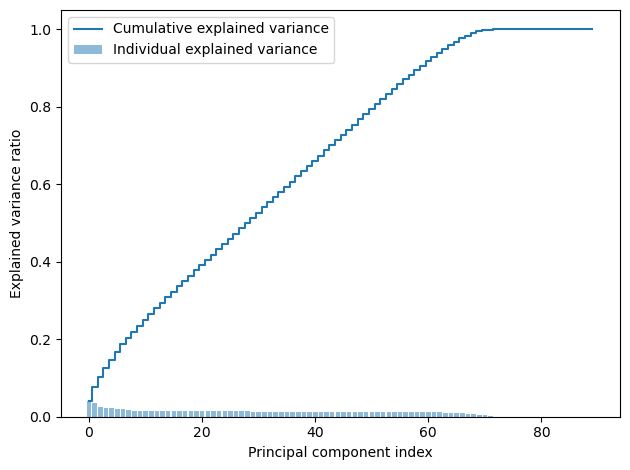

In [57]:
#### Still there are many attributes to be explored. 

import matplotlib.pyplot as plt
cum_sum_exp_u = np.cumsum(var_exp_u)
plt.bar(range(0,len(var_exp_u)),var_exp_u, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp_u)), cum_sum_exp_u, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### "Uncovering the Optimal Principal Components: The Power of PCA Scree Plots with Cumulative Variance for Correlated and Uncorrelated Variables"

Principal Component Analysis (PCA) is a widely used statistical method that reduces the dimensionality of a dataset by identifying the most important variables, known as principal components. One way to visualize the results of a PCA is by creating a scree plot.

A scree plot is a graphical tool that is commonly used in Principal Component Analysis (PCA) to help determine the optimal number of principal components to retain for subsequent analysis. A scree plot typically displays the eigenvalues of each principal component in **descending order**, along with a line representing the cumulative proportion of variance explained by the principal components.
* In a **scree plot**, the eigenvalues are plotted on the y-axis and the principal components on the x-axis. A common practice is to plot both the eigenvalues and the cumulative variance explained by the principal components. The scree plot allows us to visualize the contribution of each principal component to the overall variance of the dataset.
*We can use the **cumulative variance** explained to determine the optimal number of principal components to retain for further analysis. Generally, we want to retain enough principal components to capture at least 80-90% of the total variance in the data.

In [58]:
principalf=PCA()
principalf.fit(Scaled_data_u)
x_u=principalf.transform(Scaled_data_u)
 
# Check the dimensions of data after PCA
print(x_u.shape)

(2248148, 90)


### Cumulative Variance Plot

In [112]:
#with log -  enables to understand the differences between the magnitude and makes the drawing observations easier
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['PC_comp'], empty='none')

# The basic line
#line = alt.Chart(source).mark_line(interpolate='basis').encode(
line = alt.Chart(df_pc_u).mark_line(color="gray").transform_window(
    cumulative_statistic='sum(Explained Variance)'
).encode(
    alt.Y('cumulative_statistic:Q'),#,title ="sum of Explained Variance"),
    x=('PC_comp:N'),
    #color=alt.Color('Explained_Variance:Q')
    #column=alt.Column('Explained_Variance:Q', sort=alt.SortField("sort_val", order="descending")),

).properties(
    width=600
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(df_pc_u).mark_point().encode(
    x='PC_comp:N',
    opacity=alt.value(0),
).add_selection(
    nearest
)
# version 5 docs
# ).add_params(
#     nearest
# )

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest,'cumulative_statistic:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(df_pc_u).mark_rule(color='black').encode(
    x='PC_comp:N',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
chart = alt.layer(
    line, selectors, points, rules, text
).properties(
    width=800, height=400
)

chart

alt.LayerChart(...)

### Scree Plot

In [113]:
# highlight = alt.selection(type='single',
#     on="mouseover", fields=["Explained Variance"], nearest=True
# )

# 
input_dropdown = alt.binding_select(options=[0,1,2,3,4,5,6,7,8,9,10,11,12,13],
                                   name='PC_comp')

# colorscale = alt.Scale(domain=['sun', 'fog', 'drizzle', 'rain', 'snow'],
#                        range=['goldenrod', 'gray', 'lightblue', 'steelblue', 'midnightblue'])


selection = alt.selection_single(fields=['PC_comp'], bind=input_dropdown)

color = alt.condition(selection, # what is determining the logic
                     alt.Color('PC_comp:N',scale=alt.Scale(scheme="tealblues")), # if the logic is true
                     alt.value('lightgray')) # if the logic is false

opacity = alt.condition(selection, alt.value(1.0), alt.value(0.50))


rect = alt.Chart(df_pc_u).mark_rect(size=90).encode(
    alt.Y('Explained Variance:Q'),
    x=('PC_comp:N'),
    tooltip=['Explained Variance:Q','PC_comp:N'],
    color = color,
    opacity=opacity
    #column=alt.Column('Explained_Variance:Q', sort=alt.SortField("sort_val", order="descending")),

).add_selection(
  selection
).properties(
    width=800
)

text = alt.Chart(df_pc_u).mark_text( dy=100, color='#333').encode(
    x=alt.X('PC_comp:N'),
    y=alt.Y('Explained Variance:Q'),
    #detail='Explained Variance:Q',
    text=alt.Text('Explained Variance:Q',format='.2f')
)

rect
# .add_selection(
#     highlight
# )

alt.Chart(...)

In [110]:
scree = alt.Chart(df_pc_u).encode(
    alt.Y('Explained Variance'),#,title ="Explained Variance"),
    x=('PC_comp:N'),
    color =alt.value('black')
    #color=alt.Color('Explained_Variance:Q')
    #column=alt.Column('Explained_Variance:Q', sort=alt.SortField("sort_val", order="descending")),

).properties(
    width=800
)
scree.mark_line()+scree.mark_point()
# base.mark_line() + base.mark_point()  .mark_line(color="darkgray")

alt.LayerChart(...)

In [114]:
# (rect + chart + scree ).properties(
#     title="PCA-based Dashboard :Explained Variance of each component and its cumulative",
#     #tooltip=['Explained Variance:Q','PC_comp:N'],

#     width=500,
# ).configure_axis(
#     labelFontSize=20,
#     titleFontSize=10
# )
# https://vega.github.io/vega/docs/schemes/
(rect+ chart + scree.mark_line()+scree.mark_point()).layer[0].encoding.y.title = 'Explained Variance'

(rect+ chart + scree.mark_line()+scree.mark_point()).configure_title(
    fontSize=20,
    font='Courier',
    anchor='start',
    color='black'
).properties(
#     width=600,
#     height=600,
    title='PCA Dashboard:Scree Plot with Cumulative Variance'
).configure_axis(
     labelFontSize=10,
     titleFontSize=10
 )
#title=alt.title(alt.expr(f'Scree Plot for PCA with Cumulative Variance'))
##.encode(y=alt.Y('Explained Variance', title='Explained Variance')


alt.LayerChart(...)

In [115]:
dashboard_secondary = (rect+ chart + scree.mark_line()+scree.mark_point())
dashboard_secondary

alt.LayerChart(...)

In [116]:
dashboard_secondary.save("dashboard_secondary.json")

In [66]:
#Cumulative Variance plot for uncorrelated variables
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['PC_comp'], empty='none')

# The basic line
#line = alt.Chart(source).mark_line(interpolate='basis').encode(
line = alt.Chart(df_pc_u).mark_line(color="gray").transform_window(
    cumulative_statistic='sum(Explained Variance)'
).encode(
    alt.Y('cumulative_statistic:Q'),#,title ="sum of Explained Variance"),
    x=('PC_comp:N'),
    #color=alt.Color('Explained_Variance:Q')
    #column=alt.Column('Explained_Variance:Q', sort=alt.SortField("sort_val", order="descending")),

).properties(
    width=600
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(df_pc_u).mark_point().encode(
    x='PC_comp:N',
    opacity=alt.value(0),
).add_selection(
    nearest
)
# version 5 docs
# ).add_params(
#     nearest
# )

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest,'cumulative_statistic:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(df_pc_u).mark_rule(color='black').encode(
    x='PC_comp:N',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
chart = alt.layer(
    line, selectors, points, rules, text
).properties(
    width=800, height=400
)




#Rect plot for uncorrelated variables
input_dropdown = alt.binding_select(options=[0,1,2,3,4,5,6,7,8,9,10,11,12,13],
                                   name='PC_comp')

# colorscale = alt.Scale(domain=['sun', 'fog', 'drizzle', 'rain', 'snow'],
#                        range=['goldenrod', 'gray', 'lightblue', 'steelblue', 'midnightblue'])


selection = alt.selection_single(fields=['PC_comp'], bind=input_dropdown)

color = alt.condition(selection, # what is determining the logic
                     alt.Color('PC_comp:N',scale=alt.Scale(scheme="tealblues")), # if the logic is true
                     alt.value('lightgray')) # if the logic is false

opacity = alt.condition(selection, alt.value(1.0), alt.value(0.50))


rect = alt.Chart(df_pc_u).mark_rect(size=90).encode(
    alt.Y('Explained Variance:Q'),
    x=('PC_comp:N'),
    tooltip=['Explained Variance:Q','PC_comp:N'],
    color = color,
    opacity=opacity
    #column=alt.Column('Explained_Variance:Q', sort=alt.SortField("sort_val", order="descending")),

).add_selection(
  selection
).properties(
    width=800
)

text = alt.Chart(df_pc_u).mark_text( dy=100, color='#333').encode(
    x=alt.X('PC_comp:N'),
    y=alt.Y('Explained Variance:Q'),
    #detail='Explained Variance:Q',
    text=alt.Text('Explained Variance:Q',format='.2f')
)

#Scree plot for uncorrelated variables
scree = alt.Chart(df_pc_u).encode(
    alt.Y('Explained Variance'),#,title ="Explained Variance"),
    x=('PC_comp:N'),
    color =alt.value('black')
    #color=alt.Color('Explained_Variance:Q')
    #column=alt.Column('Explained_Variance:Q', sort=alt.SortField("sort_val", order="descending")),

).properties(
    width=800
)
# scree.mark_line()+scree.mark_point()


# Final Multilayered plot for uncorrelated variables
(rect+ chart + scree.mark_line()+scree.mark_point()).layer[0].encoding.y.title = 'Explained Variance'

(rect+ chart + scree.mark_line()+scree.mark_point()).configure_title(
    fontSize=20,
    font='Courier',
    anchor='start',
    color='black'
).properties(
#     width=600,
#     height=600,
    title='PCA Dashboard:Scree Plot with Cumulative Variance'
).configure_axis(
     labelFontSize=10,
     titleFontSize=10
 )

alt.LayerChart(...)

In [102]:
Dashboard2 = (rect+ chart + scree.mark_line()+scree.mark_point())

In [103]:
Dashboard2.save("Dashboard2.json")

*In contrast, for uncorrelated variables, the eigenvalues and cumulative variance explained are expected to decline at a similar rate as for correlated variables. This is because uncorrelated variables already capture the maximum amount of information, and PCA does not need to remove any redundancy.* 

**However, in this case, the scree plot will show a linear decline in both eigenvalues and cumulative variance explained!!!**

**This indicates that each principal component contributes equally to the overall variance of the data, and none of them are redundant.**

### PCA for correlated Variables

In [67]:
# Create correlation matrix
corr_matrix = df_pca.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

In [68]:
to_drop

['End_Lat',
 'End_Lng',
 'Wind_Chill(F)',
 'Weather_Condition',
 'Civil_Twilight_Night',
 'Civil_Twilight_nan',
 'Nautical_Twilight_Night',
 'Nautical_Twilight_nan',
 'Astronomical_Twilight_Night',
 'Astronomical_Twilight_nan',
 'Bump_True',
 ('N',),
 ('WV',),
 'US/Pacific',
 'US/Mountain']

In [69]:
fp = df_pca[to_drop]
fp

/Users/bhupatiraju/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/pandas/core/common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


,End_Lat,End_Lng,Wind_Chill(F),Weather_Condition,Civil_Twilight_Night,Civil_Twilight_nan,Nautical_Twilight_Night,Nautical_Twilight_nan,Astronomical_Twilight_Night,Astronomical_Twilight_nan,Bump_True,"(N,)","(WV,)",US/Pacific,US/Mountain
0,40.112060,-83.031870,36.1,1457,1,0,1,0,1,0,0,1.0,0.0,1.0,0.0
1,39.865010,-84.048730,NaN,701,1,0,1,0,1,0,0,1.0,0.0,1.0,0.0
2,39.102090,-84.523960,NaN,1153,1,0,1,0,0,0,0,1.0,0.0,1.0,0.0
3,41.062170,-81.535470,NaN,147,1,0,0,0,0,0,0,1.0,0.0,1.0,0.0
4,39.170476,-84.501798,29.8,1153,0,0,0,0,0,0,0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,33.998880,-117.370940,86.0,1590,0,0,0,0,0,0,0,1.0,1.0,0.0,1.0
2845338,32.765550,-117.153630,70.0,1334,0,0,0,0,0,0,0,1.0,1.0,0.0,1.0
2845339,33.777400,-117.857270,73.0,1757,0,0,0,0,0,0,0,1.0,1.0,0.0,1.0
2845340,33.983110,-118.395650,71.0,1752,0,0,0,0,0,0,0,1.0,1.0,0.0,1.0


In [70]:
# z = pd.get_dummies(data=ff, columns=['Traffic_Calming'],dummy_na=True,drop_first=True)
# z

In [71]:
fp.isna().sum()

End_Lat                             0
End_Lng                             0
Wind_Chill(F)                  469643
Weather_Condition                   0
Civil_Twilight_Night                0
Civil_Twilight_nan                  0
Nautical_Twilight_Night             0
Nautical_Twilight_nan               0
Astronomical_Twilight_Night         0
Astronomical_Twilight_nan           0
Bump_True                           0
(N,)                                0
(WV,)                               0
US/Pacific                          0
US/Mountain                         0
dtype: int64

In [72]:
fp=fp.dropna()

In [73]:
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(fp)
Scaled_data_p=scaling.transform(fp)

/Users/bhupatiraju/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/Users/bhupatiraju/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


In [74]:
from numpy.linalg import eigh

# Determine covariance matrix

cov_matrix = np.cov(Scaled_data_p, rowvar=False)
#
# Determine eigenvalues and eigenvectors
#
egnvalues, egnvectors = eigh(cov_matrix)
#
# Determine explained variance
#
total_egnvalues = sum(egnvalues)
var_exp_p = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]

In [75]:
var_exp_p

[0.2226697891168234,
 0.20057282028670595,
 0.1898994728165469,
 0.09881690871966937,
 0.06679024177262308,
 0.06569226408012585,
 0.06488194578263534,
 0.03248651109096942,
 0.028856549600649147,
 0.013037726890342416,
 0.0083603187677089,
 0.004798355953428486,
 0.0031370951217717198,
 3.3358036309503893e-18,
 -3.3358036313538077e-18]

In [76]:
df_pc = pd.DataFrame(data=var_exp_p,columns=['Explained Variance'])
df_pc

,Explained Variance
0,2.226698e-01
1,2.005728e-01
2,1.898995e-01
3,9.881691e-02
4,6.679024e-02
5,6.569226e-02
6,6.488195e-02
7,3.248651e-02
8,2.885655e-02
9,1.303773e-02


In [77]:
df_pc.shape

(15, 1)

In [78]:
pca_col_f =[f"PC{i}" for i in range(df_pc.shape[0])]
pca_col_f

['PC0',
 'PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14']

In [79]:
df_pc['PCA_']=pca_col_f
df_pc

,Explained Variance,PCA_
0,2.226698e-01,PC0
1,2.005728e-01,PC1
2,1.898995e-01,PC2
3,9.881691e-02,PC3
4,6.679024e-02,PC4
5,6.569226e-02,PC5
6,6.488195e-02,PC6
7,3.248651e-02,PC7
8,2.885655e-02,PC8
9,1.303773e-02,PC9


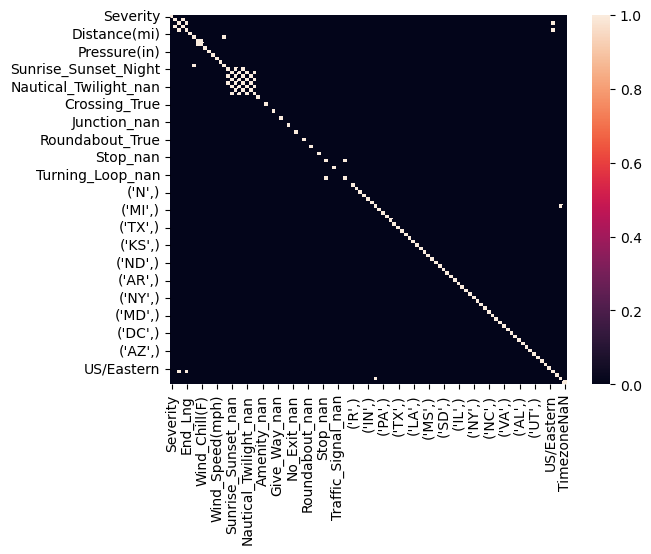

In [80]:
sns.heatmap(df_pca.corr()>0.75)

In [81]:
pca_sub_p = pd.DataFrame(var_exp_p,columns=['Explained Variance'])
pca_sub_p['PC_comp'] = [i for i in range(0,15)]
pca_sub_p

,Explained Variance,PC_comp
0,2.226698e-01,0
1,2.005728e-01,1
2,1.898995e-01,2
3,9.881691e-02,3
4,6.679024e-02,4
5,6.569226e-02,5
6,6.488195e-02,6
7,3.248651e-02,7
8,2.885655e-02,8
9,1.303773e-02,9


In [82]:
#Saving the data to file

# name of csv file  
filename = "csv_data_correlated.csv"
      
# writing to csv file  
with open(filename, 'w') as csvfile:  
    # creating a csv writer object  
    csvwriter = csv.writer(csvfile)  
          
    # writing the fields  
    csvwriter.writerow(pca_sub_p.columns)  
          
    # writing the data rows  
    csvwriter.writerows(pca_sub_p.values)


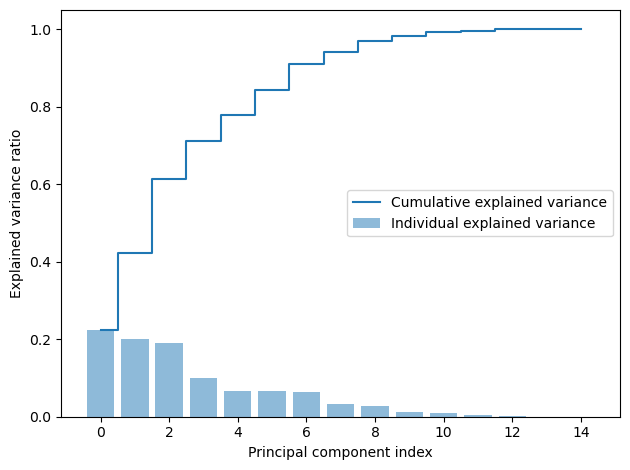

In [83]:
#### Still there are many attributes to be explored. 

import matplotlib.pyplot as plt
cum_sum_exp = np.cumsum(var_exp_p)
plt.bar(range(0,len(var_exp_p)),var_exp_p, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [84]:
principalf=PCA()
principalf.fit(Scaled_data_p)
x_p=principalf.transform(Scaled_data_p)
 
# Check the dimensions of data after PCA
print(x_p.shape)

(2375699, 15)


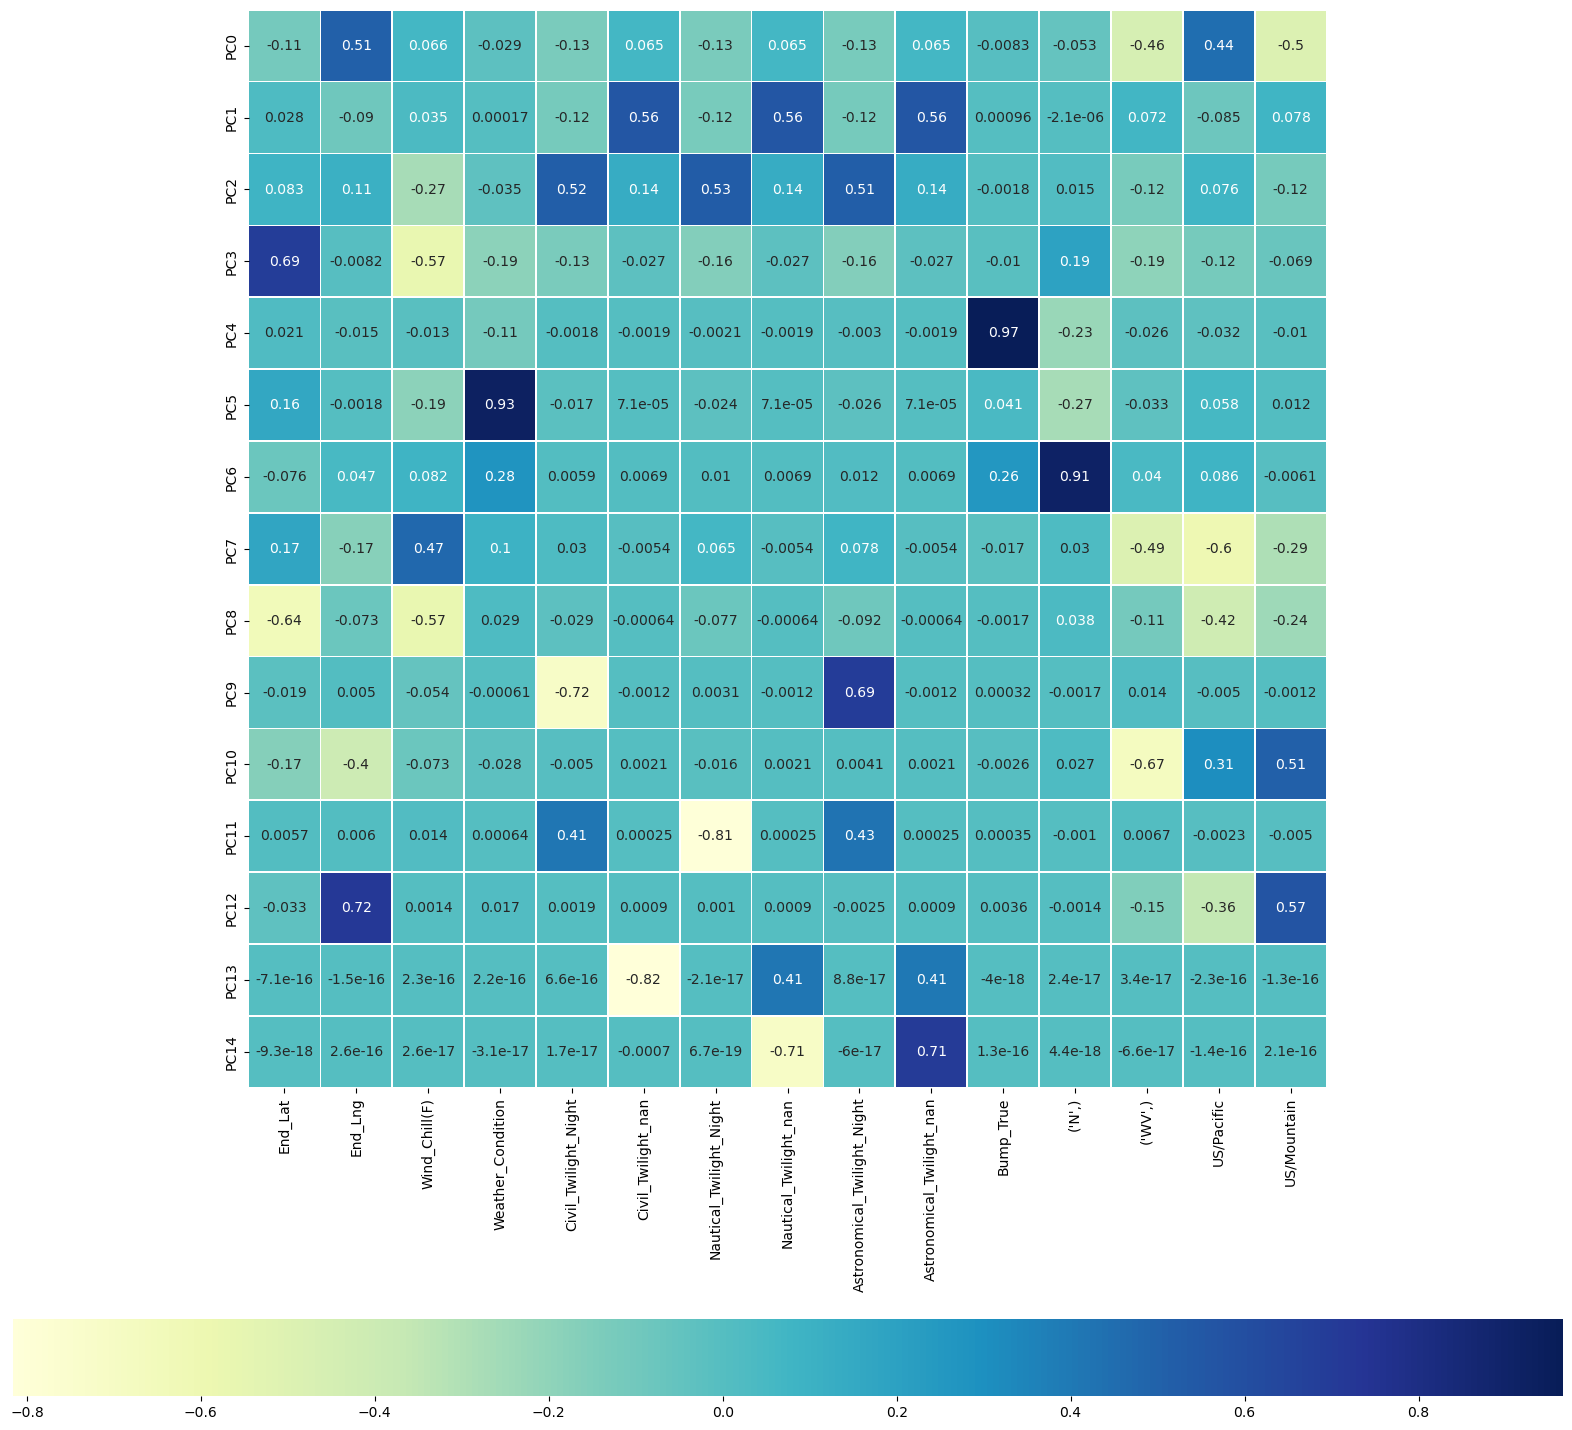

In [85]:
plt.figure(figsize = (20,20))
ax = sns.heatmap(principalf.components_,
                 cmap='YlGnBu',
                 yticklabels=pca_col_f,
                 xticklabels=list(fp.columns),
                 cbar_kws={"orientation": "horizontal"},linewidths=.5,annot =True)
ax.set_aspect("equal")

In [86]:
principalf.components_

array([[-1.09562117e-01,  5.12489064e-01,  6.59981581e-02,
        -2.88413335e-02, -1.33374487e-01,  6.52697496e-02,
        -1.33062043e-01,  6.52697496e-02, -1.26960851e-01,
         6.52697496e-02, -8.32534107e-03, -5.30270684e-02,
        -4.58776615e-01,  4.43811042e-01, -4.95423432e-01],
       [ 2.82334005e-02, -8.96994097e-02,  3.51713166e-02,
         1.72719026e-04, -1.19057915e-01,  5.56383394e-01,
        -1.21995398e-01,  5.56383394e-01, -1.17299549e-01,
         5.56383394e-01,  9.63127486e-04, -2.10514007e-06,
         7.19092206e-02, -8.45239954e-02,  7.80985169e-02],
       [ 8.27112177e-02,  1.10395117e-01, -2.72921570e-01,
        -3.52672562e-02,  5.15994165e-01,  1.36798102e-01,
         5.32435257e-01,  1.36798102e-01,  5.14215778e-01,
         1.36798102e-01, -1.80352433e-03,  1.52091828e-02,
        -1.21951312e-01,  7.60794371e-02, -1.18535755e-01],
       [ 6.92327420e-01, -8.19271114e-03, -5.68104842e-01,
        -1.88682515e-01, -1.31864605e-01, -2.66558310

In [87]:
principalf.explained_variance_ratio_

array([2.22669789e-01, 2.00572820e-01, 1.89899473e-01, 9.88169087e-02,
       6.67902418e-02, 6.56922641e-02, 6.48819458e-02, 3.24865111e-02,
       2.88565496e-02, 1.30377269e-02, 8.36031877e-03, 4.79835595e-03,
       3.13709512e-03, 4.99996473e-29, 2.39431765e-34])

In [88]:
heatmap_data = pd.DataFrame(principalf.components_,index=pca_col_f,columns=fp.columns)
heatmap_data

,End_Lat,End_Lng,Wind_Chill(F),Weather_Condition,Civil_Twilight_Night,Civil_Twilight_nan,Nautical_Twilight_Night,Nautical_Twilight_nan,Astronomical_Twilight_Night,Astronomical_Twilight_nan,Bump_True,"(N,)","(WV,)",US/Pacific,US/Mountain
PC0,-1.095621e-01,5.124891e-01,6.599816e-02,-2.884133e-02,-1.333745e-01,0.065270,-1.330620e-01,0.065270,-1.269609e-01,0.065270,-8.325341e-03,-5.302707e-02,-4.587766e-01,4.438110e-01,-4.954234e-01
PC1,2.823340e-02,-8.969941e-02,3.517132e-02,1.727190e-04,-1.190579e-01,0.556383,-1.219954e-01,0.556383,-1.172995e-01,0.556383,9.631275e-04,-2.105140e-06,7.190922e-02,-8.452400e-02,7.809852e-02
PC2,8.271122e-02,1.103951e-01,-2.729216e-01,-3.526726e-02,5.159942e-01,0.136798,5.324353e-01,0.136798,5.142158e-01,0.136798,-1.803524e-03,1.520918e-02,-1.219513e-01,7.607944e-02,-1.185358e-01
PC3,6.923274e-01,-8.192711e-03,-5.681048e-01,-1.886825e-01,-1.318646e-01,-0.026656,-1.572124e-01,-0.026656,-1.571153e-01,-0.026656,-1.021164e-02,1.939691e-01,-1.915021e-01,-1.191966e-01,-6.885787e-02
PC4,2.139343e-02,-1.469662e-02,-1.288727e-02,-1.134229e-01,-1.802872e-03,-0.001934,-2.129122e-03,-0.001934,-2.975279e-03,-0.001934,9.654808e-01,-2.287981e-01,-2.557692e-02,-3.167234e-02,-1.041547e-02
PC5,1.627299e-01,-1.813873e-03,-1.863797e-01,9.273074e-01,-1.662285e-02,0.000071,-2.372448e-02,0.000071,-2.570698e-02,0.000071,4.062980e-02,-2.666380e-01,-3.308572e-02,5.834843e-02,1.155141e-02
PC6,-7.602354e-02,4.709878e-02,8.200139e-02,2.778565e-01,5.918002e-03,0.006855,1.003664e-02,0.006855,1.211684e-02,0.006855,2.563455e-01,9.125933e-01,4.008571e-02,8.640897e-02,-6.102334e-03
PC7,1.731254e-01,-1.717855e-01,4.729180e-01,1.019367e-01,2.967977e-02,-0.005370,6.458445e-02,-0.005370,7.841837e-02,-0.005370,-1.679892e-02,2.954513e-02,-4.938506e-01,-6.036600e-01,-2.928102e-01
PC8,-6.398248e-01,-7.273490e-02,-5.686882e-01,2.935750e-02,-2.871298e-02,-0.000638,-7.696596e-02,-0.000638,-9.208023e-02,-0.000638,-1.714338e-03,3.816180e-02,-1.075365e-01,-4.189956e-01,-2.392840e-01
PC9,-1.946090e-02,4.961574e-03,-5.398600e-02,-6.092826e-04,-7.170329e-01,-0.001182,3.062198e-03,-0.001182,6.944835e-01,-0.001182,3.160927e-04,-1.655597e-03,1.397620e-02,-5.007040e-03,-1.204477e-03


In [89]:
rect = alt.Chart(heatmap_data).mark_rect().encode(
    alt.Y('index:N'),
    x=('heatmap_data.columns:N'),
    tooltip=['principalf.components_:Q','index:N'],
    color = 'principalf.components_:Q',
    opacity=opacity
    #column=alt.Column('Explained_Variance:Q', sort=alt.SortField("sort_val", order="descending")),

).properties(
    width=800
)


### Cumulative Variance Plot

In [90]:
#with log -  enables to understand the differences between the magnitude and makes the drawing observations easier
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['PC_comp'], empty='none')

# The basic line
#line = alt.Chart(source).mark_line(interpolate='basis').encode(
line = alt.Chart(pca_sub_p).mark_line(color="gray").transform_window(
    cumulative_statistic='sum(Explained Variance)'
).encode(
    alt.Y('cumulative_statistic:Q'),#,title ="sum of Explained Variance"),
    x=('PC_comp:N'),
    #color=alt.Color('Explained_Variance:Q')
    #column=alt.Column('Explained_Variance:Q', sort=alt.SortField("sort_val", order="descending")),

).properties(
    width=600
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(pca_sub_p).mark_point().encode(
    x='PC_comp:N',
    opacity=alt.value(0),
).add_selection(
    nearest
)
# version 5 docs
# ).add_params(
#     nearest
# )

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest,'cumulative_statistic:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(pca_sub_p).mark_rule(color='black').encode(
    x='PC_comp:N',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
chart = alt.layer(
    line, selectors, points, rules, text
).properties(
    width=800, height=300
)

chart

alt.LayerChart(...)

In [97]:
chart.save('chart1.json')

### Scree Plot

In [91]:
scree = alt.Chart(pca_sub_p).encode(
    alt.Y('Explained Variance'),#,title ="Explained Variance"),
    x=('PC_comp:N'),
    color =alt.value('black')
    #color=alt.Color('Explained_Variance:Q')
    #column=alt.Column('Explained_Variance:Q', sort=alt.SortField("sort_val", order="descending")),

).properties(
    width=600
)
scree.mark_line()+scree.mark_point()
# base.mark_line() + base.mark_point()  .mark_line(color="darkgray")

alt.LayerChart(...)

## Rect plot

In [92]:
# highlight = alt.selection(type='single',
#     on="mouseover", fields=["Explained Variance"], nearest=True
# )

# https://vega.github.io/vega/docs/schemes/ 
input_dropdown = alt.binding_select(options=[0,1,2,3,4,5,6,7,8,9,10,11,12,13],
                                   name='PC_comp')

# colorscale = alt.Scale(domain=['sun', 'fog', 'drizzle', 'rain', 'snow'],
#                        range=['goldenrod', 'gray', 'lightblue', 'steelblue', 'midnightblue'])


selection = alt.selection_single(fields=['PC_comp'], bind=input_dropdown)

color = alt.condition(selection, # what is determining the logic
                     alt.Color('PC_comp:N',scale=alt.Scale(scheme="tealblues")), # if the logic is true
                     alt.value('lightgray')) # if the logic is false

opacity = alt.condition(selection, alt.value(1.0), alt.value(0.50))


rect = alt.Chart(pca_sub_p).mark_rect().encode(
    alt.Y('Explained Variance:Q'),
    x=('PC_comp:N'),
    tooltip=['Explained Variance:Q','PC_comp:N'],
    color = color,
    opacity=opacity
    #column=alt.Column('Explained_Variance:Q', sort=alt.SortField("sort_val", order="descending")),

).add_selection(
  selection
).properties(
    width=800
)

text = alt.Chart(pca_sub_p).mark_text(dx=-10, dy=10, color='#333').encode(
    x=alt.X('PC_comp:N'),
    y=alt.Y('Explained Variance:Q'),
    #detail='Explained Variance:Q',
    text=alt.Text('Explained Variance:Q', format='.3f')
)

rect+text
# .add_selection(
#     highlight
# )

alt.LayerChart(...)

In [93]:
rect+text+scree.mark_line()+scree.mark_point()

alt.LayerChart(...)

### PCA Dashboard

In [94]:

# rect plot for correlated variables
input_dropdown = alt.binding_select(options=[0,1,2,3,4,5,6,7,8,9,10,11,12,13],
                                   name='PC_comp')

selection = alt.selection_single(fields=['PC_comp'], bind=input_dropdown)

color = alt.condition(selection, # what is determining the logic
                     alt.Color('PC_comp:N',scale=alt.Scale(scheme="tealblues")), # if the logic is true
                     alt.value('lightgray')) # if the logic is false

opacity = alt.condition(selection, alt.value(1.0), alt.value(0.50))


rect = alt.Chart(pca_sub_p).mark_rect().encode(
    alt.Y('Explained Variance:Q'),
    x=('PC_comp:N'),
    tooltip=['Explained Variance:Q','PC_comp:N'],
    color = color,
    opacity=opacity
    #column=alt.Column('Explained_Variance:Q', sort=alt.SortField("sort_val", order="descending")),

).add_selection(
  selection
).properties(
    width=800
)

text = alt.Chart(pca_sub_p).mark_text(dx=-10, dy=10, color='#333').encode(
    x=alt.X('PC_comp:N'),
    y=alt.Y('Explained Variance:Q'),
    #detail='Explained Variance:Q',
    text=alt.Text('Explained Variance:Q', format='.3f')
)



#Final Layered Plot for correlated variables
(rect+text+ chart + scree.mark_line()+scree.mark_point()).layer[0].encoding.y.title = 'Explained Variance'

(rect+text+ chart + scree.mark_line()+scree.mark_point()).configure_title(
    fontSize=20,
    font='Courier',
    anchor='start',
    color='black'
).properties(
#     width=600,
#     height=600,
    title='PCA Dashboard:Scree Plot with Cumulative Variance'
).configure_axis(
     labelFontSize=10,
     titleFontSize=10
 )
#title=alt.title(alt.expr(f'Scree Plot for PCA with Cumulative Variance'))
##.encode(y=alt.Y('Explained Variance', title='Explained Variance')


alt.LayerChart(...)

In [98]:
(rect+text+ chart + scree.mark_line()+scree.mark_point())

alt.LayerChart(...)

In [99]:
Dashboard_primary = (rect+text+ chart + scree.mark_line()+scree.mark_point())

In [100]:
Dashboard_primary

alt.LayerChart(...)

In [101]:
Dashboard_primary.save("Dashboard_primary.json")

In [95]:


# Cumulative Variance plot for correlated variables
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['PC_comp'], empty='none')

# The basic line
#line = alt.Chart(source).mark_line(interpolate='basis').encode(
line = alt.Chart(pca_sub_p).mark_line(color="gray").transform_window(
    cumulative_statistic='sum(Explained Variance)'
).encode(
    alt.Y('cumulative_statistic:Q'),#,title ="sum of Explained Variance"),
    x=('PC_comp:N'),
    #color=alt.Color('Explained_Variance:Q')
    #column=alt.Column('Explained_Variance:Q', sort=alt.SortField("sort_val", order="descending")),

).properties(
    width=600
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(pca_sub_p).mark_point().encode(
    x='PC_comp:N',
    opacity=alt.value(0),
).add_selection(
    nearest
)
# version 5 docs
# ).add_params(
#     nearest
# )

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest,'cumulative_statistic:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(pca_sub_p).mark_rule(color='black').encode(
    x='PC_comp:N',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
chart = alt.layer(
    line, selectors, points, rules, text
).properties(
    width=800, height=300
)


# scree plot for correlated variables
scree = alt.Chart(pca_sub_p).encode(
    alt.Y('Explained Variance'),#,title ="Explained Variance"),
    x=('PC_comp:N'),
    color =alt.value('black')
    #color=alt.Color('Explained_Variance:Q')
    #column=alt.Column('Explained_Variance:Q', sort=alt.SortField("sort_val", order="descending")),

).properties(
    width=600
)

# rect plot for correlated variables
input_dropdown = alt.binding_select(options=[0,1,2,3,4,5,6,7,8,9,10,11,12,13],
                                   name='PC_comp')

selection = alt.selection_single(fields=['PC_comp'], bind=input_dropdown)

color = alt.condition(selection, # what is determining the logic
                     alt.Color('PC_comp:N',scale=alt.Scale(scheme="tealblues")), # if the logic is true
                     alt.value('lightgray')) # if the logic is false

opacity = alt.condition(selection, alt.value(1.0), alt.value(0.50))


rect = alt.Chart(pca_sub_p).mark_rect().encode(
    alt.Y('Explained Variance:Q'),
    x=('PC_comp:N'),
    tooltip=['Explained Variance:Q','PC_comp:N'],
    color = color,
    opacity=opacity
    #column=alt.Column('Explained_Variance:Q', sort=alt.SortField("sort_val", order="descending")),

).add_selection(
  selection
).properties(
    width=800
)

text = alt.Chart(pca_sub_p).mark_text(dx=-10, dy=10, color='#333').encode(
    x=alt.X('PC_comp:N'),
    y=alt.Y('Explained Variance:Q'),
    #detail='Explained Variance:Q',
    text=alt.Text('Explained Variance:Q', format='.3f')
)



#Final Layered Plot for correlated variables
(rect+text+ chart + scree.mark_line()+scree.mark_point()).layer[0].encoding.y.title = 'Explained Variance'

(rect+text+ chart + scree.mark_line()+scree.mark_point()).configure_title(
    fontSize=20,
    font='Courier',
    anchor='start',
    color='black'
).properties(
#     width=600,
#     height=600,
    title='PCA Dashboard:Scree Plot with Cumulative Variance'
).configure_axis(
     labelFontSize=10,
     titleFontSize=10
 )
#title=alt.title(alt.expr(f'Scree Plot for PCA with Cumulative Variance'))
##.encode(y=alt.Y('Explained Variance', title='Explained Variance')


alt.LayerChart(...)

The scree plot allows us to visualize the contribution of each principal component to the overall variance of the dataset

This code seems to be generating a visualization of a rect plot for correlated variables, as part of a larger layered plot that includes a scree plot with cumulative variance. 

* The rect plot shows the explained variance for each principal component (PC), with the x-axis representing the PC component number and the y-axis representing the amount of explained variance. The color of each rectangle corresponds to the PC component number, with a tealblues color scheme used.The code also includes text annotations for each rectangle, displaying the amount of explained variance as a floating point number with 3 decimal places. Finally a line plot overlaid on the rect plot.
* Additionally, the code includes a scree plot with cumulative variance, represented as both a line and point plot. This plot displays the cumulative amount of explained variance for each PC component, allowing users to identify the optimal number of PCs to include in their analysis.

Overall, this code is part of a dashboard that enables users to visualize the results of a principal component analysis for both correlated and uncorrelated variables. By using scree plots with cumulative variance, users can determine the optimal number of PCs to include in their analysis, helping to reduce the dimensionality of their data while retaining as much information as possible.

In [96]:
myJekyllDir = '/Users/jnaiman/jnaiman.github.io/assets/json/'

References:
    https://vega.github.io/vega/docs/schemes/  